In [1]:
import numpy as np
import scipy.stats as st

from matplotlib import pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

How does the p-value distribution look like when there is **no** effect?

In [2]:
p_val_list = []

for i in range(0, 1000000):
    ctrl = np.random.normal(loc=100, scale=15, size=51)
    trt = np.random.normal(loc=100, scale=15, size=51)
    p_val = st.ttest_ind(trt, ctrl)[1]

    p_val_list.append(p_val)

Text(0.5, 1.0, 'When the true effect size = 0')

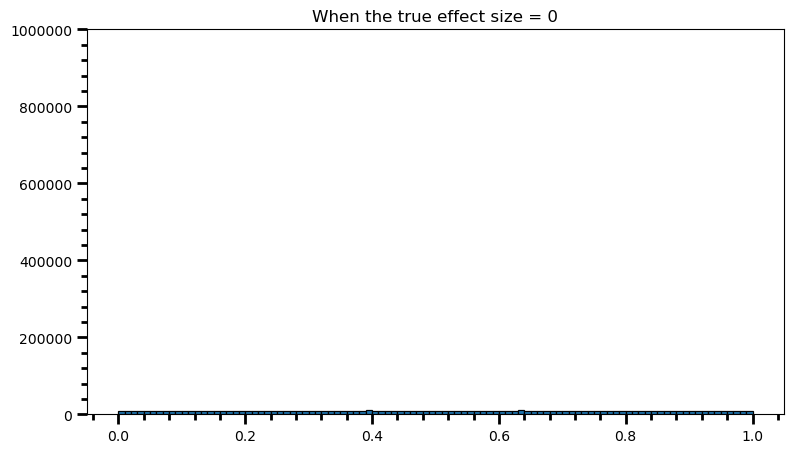

In [3]:
fig = plt.figure(figsize=(9, 5))
ax = fig.add_subplot(1, 1, 1)

plt.ticklabel_format(style='plain', axis='y')

ax.hist(p_val_list, bins=100, edgecolor='black', linewidth=.9)
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4)

ax.set_ylim(0, 1000000)
plt.title('When the true effect size = 0')

Every p-value is equally likely. That's why chosen alpha level corresponds to how often you will fool yourself in the long run, when there is no effect.\
If the chosen alpha level is .10, then under the null hypothesis 10 percent of the p-values fall below 0.10.

In [4]:
power = [val for val in p_val_list if val <= 0.05] # .05 is the chosen for alpha
print('Power: ', round(len(power) / len(p_val_list), 2))

Power:  0.05


This is our long-term type I error rate, since theoretically the power is undefined in this case (the null is the truth). We don't expect to fool ourselves more than 5% in the long run, when there is no effect.

Let's see what happens when there is a difference between interested populations:

In [5]:
p_val_list = []

for i in range(0, 1000000):
    ctrl = np.random.normal(loc=100, scale=15, size=51)
    trt = np.random.normal(loc=104.5, scale=15, size=51)
    p_val = st.ttest_ind(trt, ctrl)[1]

    p_val_list.append(p_val)

Text(0.5, 1.0, "For Cohen's d of 0.3 (true effect size)")

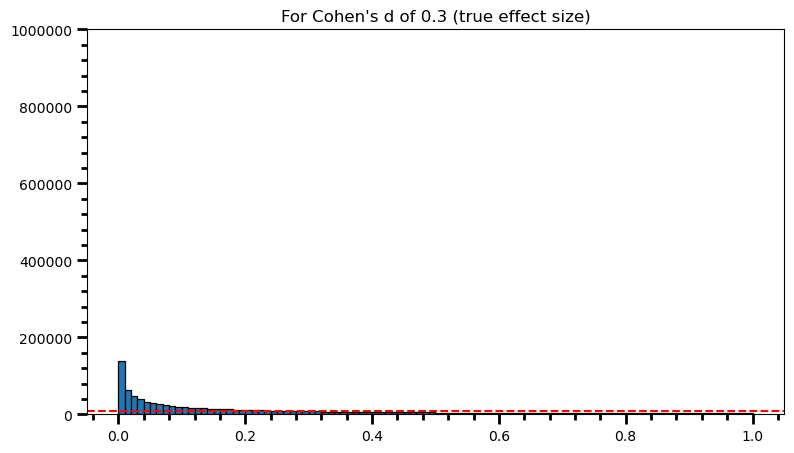

In [6]:
fig = plt.figure(figsize=(9, 5))
ax = fig.add_subplot(1, 1, 1)

plt.ticklabel_format(style='plain', axis='y')

ax.hist(p_val_list, bins=100, edgecolor='black', linewidth=.9)
ax.axhline(y=10000, color='r', linestyle='--')

ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4)

ax.set_ylim(0, 1000000)
plt.title('For Cohen\'s d of 0.3 (true effect size)')

In [7]:
power = [val for val in p_val_list if val <= 0.05] # .05 is the chosen for alpha
print('Power: ', round(len(power) / len(p_val_list), 2))

Power:  0.32


Text(0.5, 1.0, "For Cohen's d of 0.3 (true effect size)")

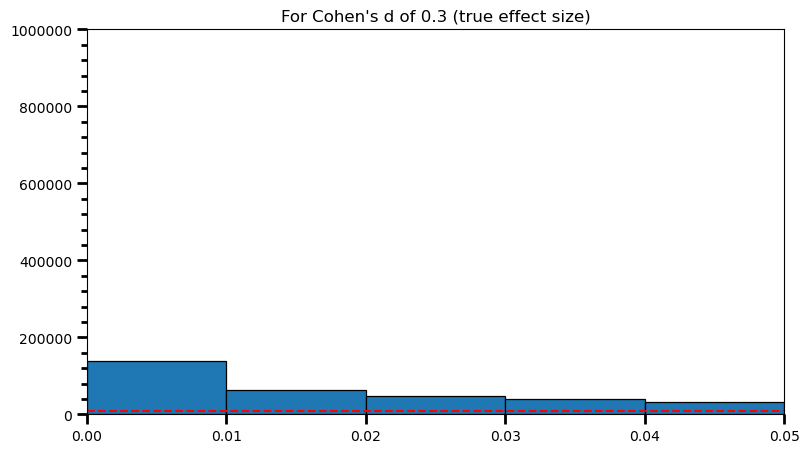

In [8]:
fig = plt.figure(figsize=(9, 5))
ax = fig.add_subplot(1, 1, 1)

plt.ticklabel_format(style='plain', axis='y')

ax.hist([val for val in p_val_list if val <= .05], bins=5, edgecolor='black', linewidth=.9)
ax.axhline(y=10000, color='r', linestyle='--')

# ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4)

ax.set_xlim(0, 0.05)
ax.set_ylim(0, 1000000)
plt.title('For Cohen\'s d of 0.3 (true effect size)')

In [9]:
p_val_list = []

for i in range(0, 1000000):
    ctrl = np.random.normal(loc=100, scale=15, size=51)
    trt = np.random.normal(loc=107.5, scale=15, size=51)
    p_val = st.ttest_ind(trt, ctrl)[1]

    p_val_list.append(p_val)

Text(0.5, 1.0, "For Cohen's d of 0.5 (true effect size)")

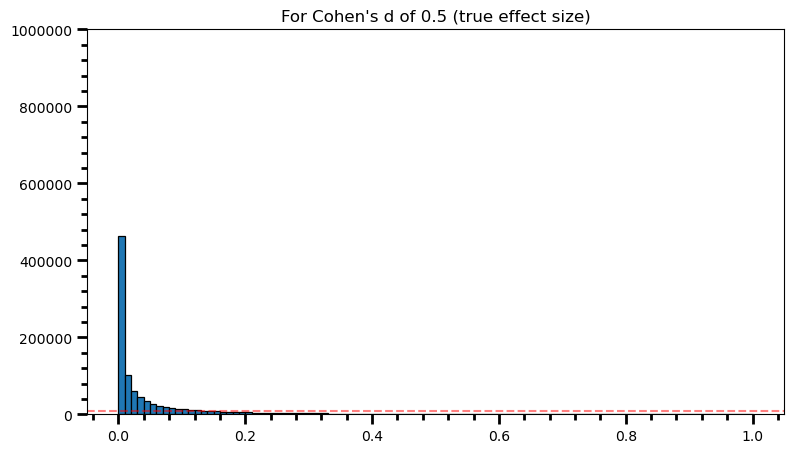

In [10]:
fig = plt.figure(figsize=(9, 5))
ax = fig.add_subplot(1, 1, 1)

plt.ticklabel_format(style='plain', axis='y')

ax.hist(p_val_list, bins=100, edgecolor='black', linewidth=.9)
ax.axhline(y=10000, color='r', linestyle='--', alpha=.5)

ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4)

ax.set_ylim(0, 1000000)
plt.title('For Cohen\'s d of 0.5 (true effect size)')

In [11]:
power = [val for val in p_val_list if val <= 0.05] # .05 is the chosen for alpha
print('Power: ', round(len(power) / len(p_val_list), 2))

Power:  0.71


Text(0.5, 1.0, "For Cohen's d of 0.5 (true effect size)")

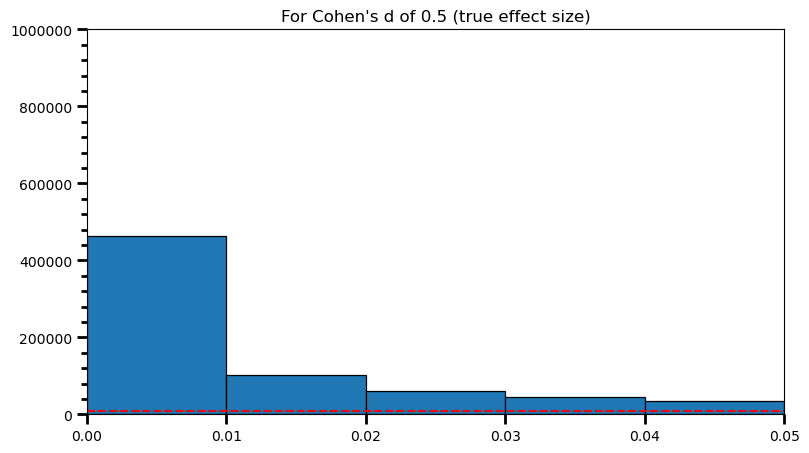

In [13]:
fig = plt.figure(figsize=(9, 5))
ax = fig.add_subplot(1, 1, 1)

plt.ticklabel_format(style='plain', axis='y')

ax.hist([val for val in p_val_list if val <= .05], bins=5, edgecolor='black', linewidth=.9)
ax.axhline(y=10000, color='r', linestyle='--')

# ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4)

ax.set_xlim(0, 0.05)
ax.set_ylim(0, 1000000)
plt.title('For Cohen\'s d of 0.5 (true effect size)')

In [19]:
p_val_list = []

for i in range(0, 1000000):
    ctrl = np.random.normal(loc=100, scale=15, size=51)
    trt = np.random.normal(loc=109.5, scale=15, size=51)
    p_val = st.ttest_ind(trt, ctrl)[1]

    p_val_list.append(p_val)

Text(0.5, 1.0, "For Cohen's d of 0.7 (true effect size)")

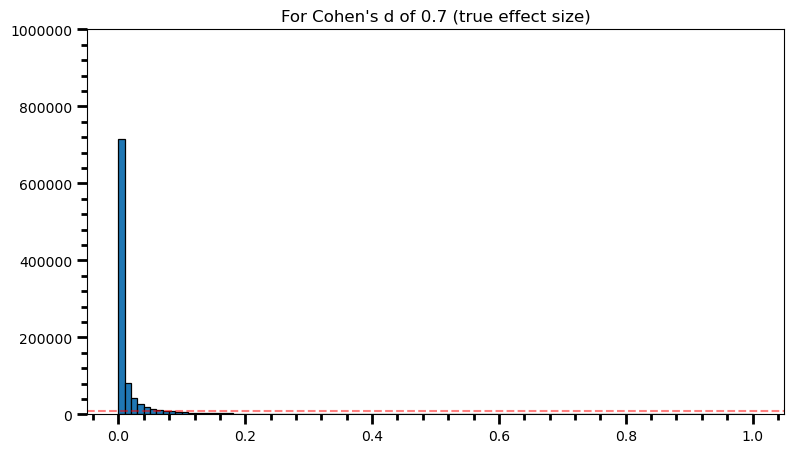

In [20]:
fig = plt.figure(figsize=(9, 5))
ax = fig.add_subplot(1, 1, 1)

plt.ticklabel_format(style='plain', axis='y')

ax.hist(p_val_list, bins=100, edgecolor='black', linewidth=.9)
ax.axhline(y=10000, color='r', linestyle='--', alpha=.5)

ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4)

ax.set_ylim(0, 1000000)
plt.title('For Cohen\'s d of 0.7 (true effect size)')

In [21]:
power = [val for val in p_val_list if val <= 0.05] # .05 is the chosen for alpha
print('Power: ', round(len(power) / len(p_val_list), 2))

Power:  0.89


Text(0.5, 1.0, "For Cohen's d of 0.7 (true effect size)")

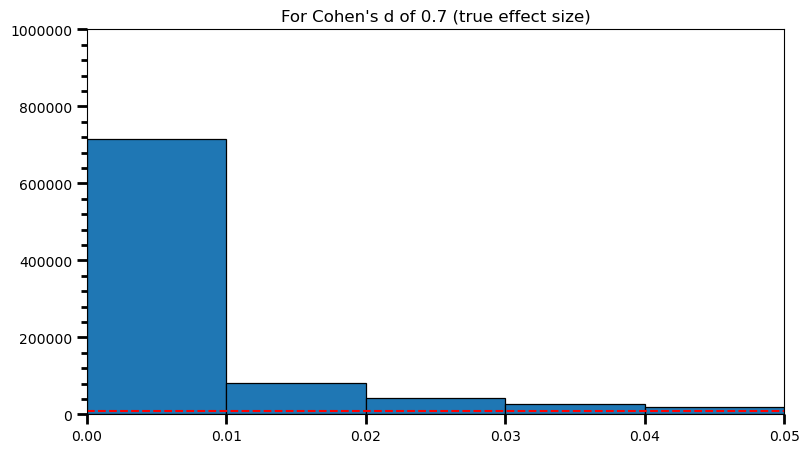

In [22]:
fig = plt.figure(figsize=(9, 5))
ax = fig.add_subplot(1, 1, 1)

plt.ticklabel_format(style='plain', axis='y')

ax.hist([val for val in p_val_list if val <= .05], bins=5, edgecolor='black', linewidth=.9)
ax.axhline(y=10000, color='r', linestyle='--')

# ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4)

ax.set_xlim(0, 0.05)
ax.set_ylim(0, 1000000)
plt.title('For Cohen\'s d of 0.7 (true effect size)')

In [23]:
print(len([val for val in p_val_list if val >= .00 and val <= .01]) / len(p_val_list))

0.715497


In [26]:
p_val_list = []

for i in range(0, 1000000):
    ctrl = np.random.normal(loc=100, scale=15, size=51)
    trt = np.random.normal(loc=112, scale=15, size=51)
    p_val = st.ttest_ind(trt, ctrl)[1]

    p_val_list.append(p_val)

Text(0.5, 1.0, "For Cohen's d of 0.8 (true effect size)")

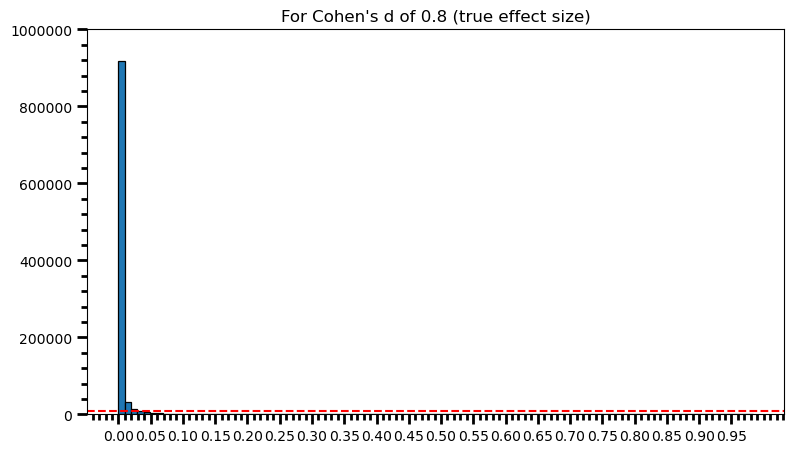

In [27]:
fig = plt.figure(figsize=(9, 5))
ax = fig.add_subplot(1, 1, 1)

plt.ticklabel_format(style='plain', axis='y')

ax.hist(p_val_list, bins=100, edgecolor='black', linewidth=.9)
ax.axhline(y=10000, color='r', linestyle='--')

ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4)

ax.set_xticks(np.arange(0, 1, 0.05))
ax.set_ylim(0, 1000000)
plt.title('For Cohen\'s d of 0.8 (true effect size)')

Text(0.5, 1.0, "For Cohen's d of 0.8 (true effect size)")

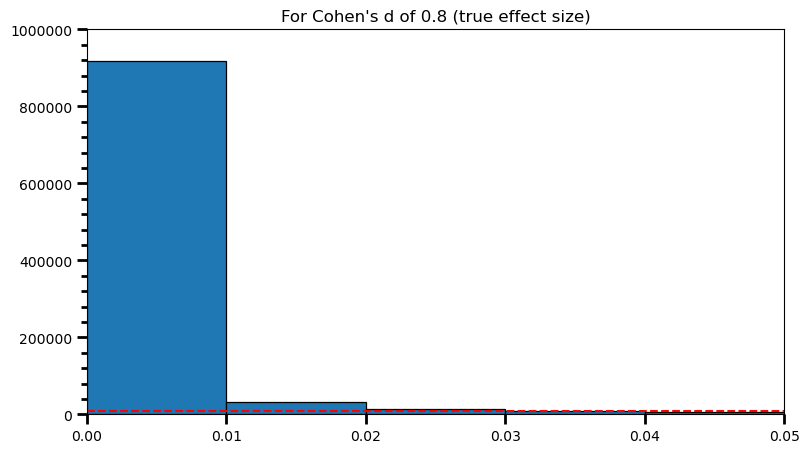

In [28]:
fig = plt.figure(figsize=(9, 5))
ax = fig.add_subplot(1, 1, 1)

plt.ticklabel_format(style='plain', axis='y')

ax.hist([val for val in p_val_list if val <= .05], bins=5, edgecolor='black', linewidth=.9)
ax.axhline(y=10000, color='r', linestyle='--')

# ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4)

ax.set_xlim(0, 0.05)
ax.set_ylim(0, 1000000)
plt.title('For Cohen\'s d of 0.8 (true effect size)')

In [29]:
print(len([val for val in p_val_list if val >= .04 and val <= .05]) / len(p_val_list), '\n',
      len([val for val in p_val_list if val >= .03 and val <= .04]) / len(p_val_list), '\n',
      len([val for val in p_val_list if val >= .02 and val <= .03]) / len(p_val_list), '\n',
      len([val for val in p_val_list if val >= .01 and val <= .02]) / len(p_val_list), '\n',
      len([val for val in p_val_list if val >= .00 and val <= .01]) / len(p_val_list))

0.005357 
 0.008169 
 0.014438 
 0.032577 
 0.918817


In [30]:
power = [val for val in p_val_list if val <= 0.05] # .05 is the chosen for alpha
print('Power: ', round(len(power) / len(p_val_list), 2))

Power:  0.98


Since as the statistical power increases, distribution of p-values chunk up at the very left: Some p-values below 0.05 become more likely (ones more close to 0.00). \
And when you have very high power, certain p-values below 0.05 (relatively high ones) become more likely under the null compared to the alternative: \
Hence, wouldn't be wise to reject the null despite p-value < .05

In [31]:
p_val_list = []

for i in range(0, 1000000):
    ctrl = np.random.normal(loc=100, scale=15, size=65) # different sample size
    trt = np.random.normal(loc=107.5, scale=15, size=65) # different sample size
    p_val = st.ttest_ind(trt, ctrl)[1]

    p_val_list.append(p_val)

In [32]:
power = [val for val in p_val_list if val <= 0.05] # .05 is the chosen for alpha
print('Power: ', round(len(power) / len(p_val_list), 2))

Power:  0.81


Text(0.5, 1.0, "For Cohen's d of 0.5 (true effect size)")

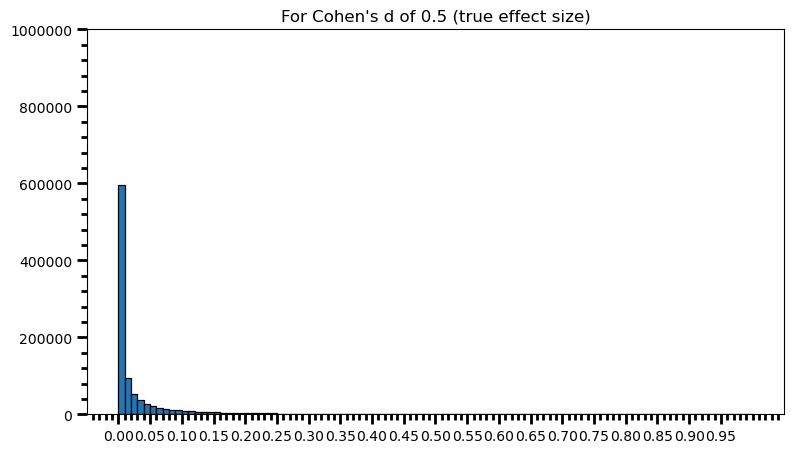

In [33]:
fig = plt.figure(figsize=(9, 5))
ax = fig.add_subplot(1, 1, 1)

plt.ticklabel_format(style='plain', axis='y')

ax.hist(p_val_list, bins=100, edgecolor='black', linewidth=.9)
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4)

ax.set_xticks(np.arange(0, 1, 0.05))
ax.set_ylim(0, 1000000)
plt.title('For Cohen\'s d of 0.5 (true effect size)')

In [34]:
p_val_list = []

for i in range(0, 1000000):
    ctrl = np.random.normal(loc=100, scale=15, size=100) # different sample size
    trt = np.random.normal(loc=107.5, scale=15, size=100) # different sample size
    p_val = st.ttest_ind(trt, ctrl)[1]

    p_val_list.append(p_val)

In [35]:
power = [val for val in p_val_list if val <= 0.05] # .05 is the chosen for alpha
print('Power: ', round(len(power) / len(p_val_list), 2))

Power:  0.94


Text(0.5, 1.0, "For Cohen's d of 0.5 (true effect size)")

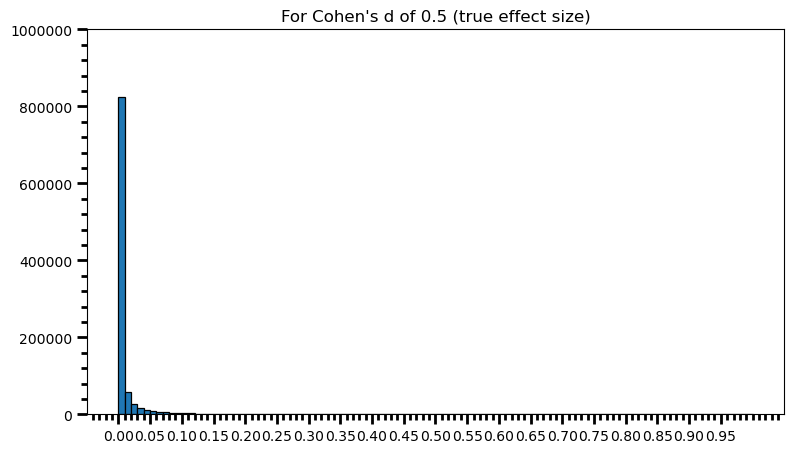

In [36]:
fig = plt.figure(figsize=(9, 5))
ax = fig.add_subplot(1, 1, 1)

plt.ticklabel_format(style='plain', axis='y')

ax.hist(p_val_list, bins=100, edgecolor='black', linewidth=.9)
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=4)

ax.set_xticks(np.arange(0, 1, 0.05))
ax.set_ylim(0, 1000000)
plt.title('For Cohen\'s d of 0.5 (true effect size)')

As one can see, statistical power also depends on the sample size.